In [17]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import numpy 
import json
import requests
import numpy as np
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [18]:
# BBC, CBS, CNN, Fox, and New York times.
target_user = ['@BBC', '@CBS', "@CNN", "@FoxNews", "@nytimes"]
filename = ["bbc_sentiment", "cbs_sentiment", "cnn_sentiment", "fox_sentiment", "nyt_sentiment"]

In [19]:
def NewsOrg_sentiment(target):
    counter = 1
    sentiments = []
    public_tweet = api.user_timeline(target, count = 100 )
    
    for tweet in public_tweet :
        
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        sentiments.append({
            "twitter source account" : target,
            "Tweets ago" : tweets_ago,
            "Date" : tweet['created_at'],
            "Compound" : compound,
            'Negative' : neg,
            "Positive"  : pos,
            "Neutral"  : neu,
            "tweet_text" : tweet["text"]
            
        })
        
        counter = counter + 1
        
    data= pd.DataFrame.from_dict(sentiments)
    data.sort_index(axis=0 ,ascending=False, inplace = True)  
    return  data

In [20]:
bbc_sentiment = NewsOrg_sentiment('@BBC')
cbs_sentiment = NewsOrg_sentiment('@CBS')
cnn_sentiment = NewsOrg_sentiment("@CNN")
fox_sentiment = NewsOrg_sentiment("@FoxNews")
nyt_sentiment = NewsOrg_sentiment("@nytimes")

In [21]:
bbc_sentiment.head()

,Compound,Date,Negative,Neutral,Positive,Tweets ago,tweet_text,twitter source account
99,0.4019,Sat Jul 14 09:07:03 +0000 2018,0.00,0.838,0.162,100,This model was bitten by a shark while posing ...,@BBC
98,0.1027,Sat Jul 14 09:54:33 +0000 2018,0.00,0.931,0.069,99,RT @CBeebiesHQ: Look WHO is in for tonight's #...,@BBC
97,-0.2732,Sat Jul 14 10:03:02 +0000 2018,0.13,0.870,0.000,98,😲The man with world's longest fingernails has ...,@BBC
96,0.0000,Sat Jul 14 11:07:03 +0000 2018,0.00,1.000,0.000,97,Sue Barker presents live coverage of Angelique...,@BBC
95,0.0000,Sat Jul 14 11:13:46 +0000 2018,0.00,1.000,0.000,96,RT @1Xtra: Tonight 9pm @Drake x @CharlieSloth ...,@BBC


In [22]:
def plotting_scatter(x, y, color, label) :  
    return plt.scatter(x, y, c = color, alpha = 0.5,  s = 200,  label = label)

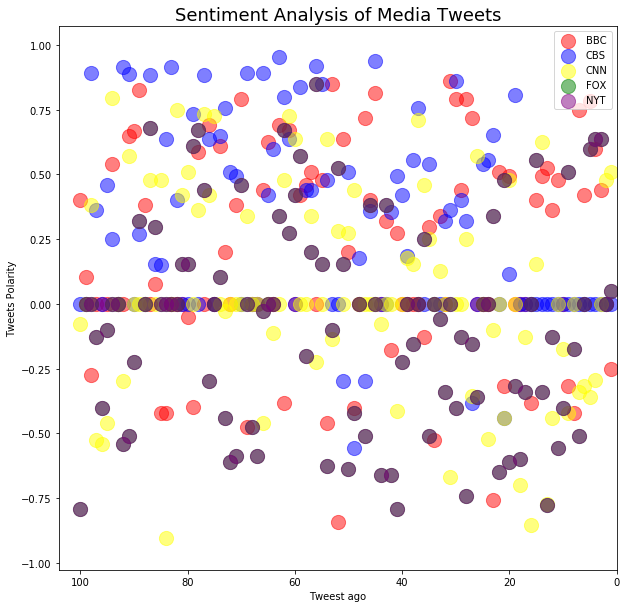

In [23]:
plt.figure(figsize =(10,10))

plotting_scatter(bbc_sentiment['Tweets ago'], bbc_sentiment['Compound'], "r", 'BBC')
plotting_scatter(cbs_sentiment['Tweets ago'], cbs_sentiment['Compound'], "b", 'CBS')
plotting_scatter(cnn_sentiment['Tweets ago'], cnn_sentiment['Compound'], "yellow", 'CNN')
plotting_scatter(fox_sentiment['Tweets ago'], fox_sentiment['Compound'], "g", 'FOX')
plotting_scatter(fox_sentiment['Tweets ago'], fox_sentiment['Compound'], "purple", 'NYT')

plt.legend(loc = "upper right")
plt.title("Sentiment Analysis of Media Tweets" ,fontsize = 18)
plt.xlabel("Tweest ago")
plt.ylabel("Tweets Polarity")
plt.xlim(104,-0.04)
plt.show()
#plt.savefig("Sentimental Analysis of Media Tweets")


In [24]:
x =  {
    "BBC" : np.mean(bbc_sentiment['Compound']), 
    "CBS" : np.mean(cbs_sentiment['Compound']),
    "CNN" : np.mean(cnn_sentiment['Compound']),
    "FOX": np.mean(fox_sentiment['Compound']),
    "NYT": np.mean(nyt_sentiment['Compound']) }
x

{'BBC': 0.185015,
 'CBS': 0.29247,
 'CNN': 0.045683999999999995,
 'FOX': -0.059529000000000006,
 'NYT': -0.11616300000000006}

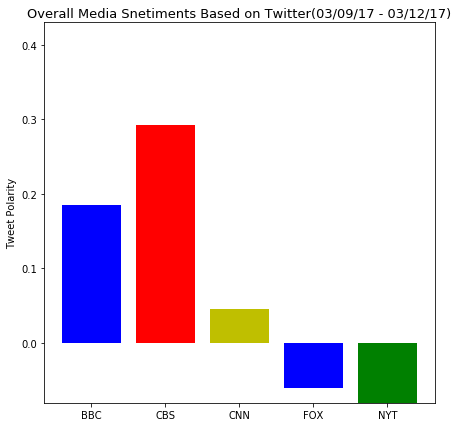

In [25]:
plt.figure(figsize = (7,7))
plt.bar(x.keys(), x.values(), color = ['b', 'r', 'y', 'b', 'g'])
plt.title('Overall Media Snetiments Based on Twitter(03/09/17 - 03/12/17)', fontsize = 13)
plt.ylabel("Tweet Polarity")
plt.ylim(-0.08, 0.43)
plt.show()